In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandasql as ps
from scipy.stats import pearsonr
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [3]:
#importing data set
df=pd.read_csv('ADANIPORTS.csv')

In [3]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [4]:
#reading the data
df.sample

<bound method NDFrame.sample of             Date      Symbol Series  Prev Close    Open     High     Low  \
0     2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.00   
1     2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.00   
2     2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.00   
3     2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.00   
4     2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.00   
...          ...         ...    ...         ...     ...      ...     ...   
3317  2021-04-26  ADANIPORTS     EQ      725.35  733.00   739.65  728.90   
3318  2021-04-27  ADANIPORTS     EQ      730.75  735.00   757.50  727.35   
3319  2021-04-28  ADANIPORTS     EQ      749.15  755.00   760.00  741.10   
3320  2021-04-29  ADANIPORTS     EQ      746.25  753.20   765.85  743.40   
3321  2021-04-30  ADANIPORTS     EQ      746.75  739.00   759.45  724.50   

       Last   Close    VWAP    Volume      Turnover    

In [5]:
#Gives top five records
df.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [6]:
#Gives last five records
df.tail(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.0,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.0,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.0,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.2,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942
3321,2021-04-30,ADANIPORTS,EQ,746.75,739.0,759.45,724.50,726.4,730.05,743.35,12600934,9.366911e+14,132141.0,3514692,0.2789


In [7]:
#Give number of rows and columns
print("Data shape :",df.shape)

Data shape : (3322, 15)


In [8]:
#Exploratory data analysis is a 
#quick look at your dataset to help you 
#understand its structure, form, and size, as well as find patterns

df.info()
df.describe()
#df.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800


In [9]:
#finding duplicate data
df.duplicated().sum()

0

In [10]:
#Empty values:
df.isnull().sum().sort_values(ascending = False)

Trades                866
Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [11]:
df['Trades'].isnull().count()

3322

In [12]:
#removing null values from records from each column
df.dropna(axis='columns', how ='all')

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


In [13]:
#droping column which has null values 
df.drop('Trades',axis=1)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,1304895,0.0942


In [14]:
#after droping unwanted column final columns
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

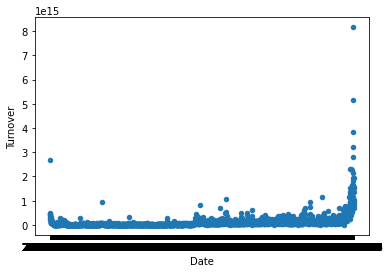

In [15]:
df.plot(kind = 'scatter', x = 'Date', y = 'Turnover')
plt.show()

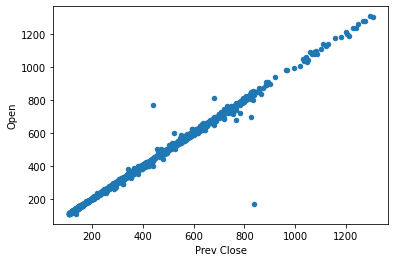

<Figure size 432x288 with 0 Axes>

In [16]:
df.plot(kind = 'scatter', x = 'Prev Close', y = 'Open')
plt.show()
plt.savefig("scatter2.jpg",dpi=600)

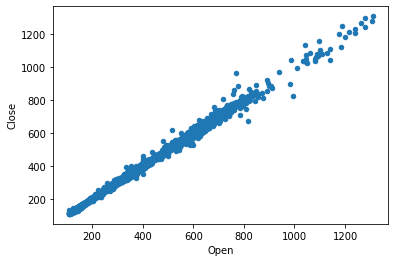

<Figure size 432x288 with 0 Axes>

In [40]:
df.plot(kind = 'scatter', y = 'Close', x = 'Open')
plt.show()
plt.savefig("scatter2.jpg",dpi=600)

In [18]:
#calculating the correlation coefficient between points and assists
df['Prev Close'].corr(df['Open'])

0.99722838783406

In [19]:
#calculate p-value of correlation coefficient between 'Prev Close' and 'Open' columns
pearsonr(df['Prev Close'], df['Open'])
'''
The first value in the output displays the correlation coefficient (0.9972283878340599) and the second value displays the p-value (0.0) associated with this correlation coefficient.

Since the p-value is less than α = 0.05, we would conclude that the correlation between 'Prev Close' and 'Open' is statistically significant.
'''

"\nThe first value in the output displays the correlation coefficient (0.9972283878340599) and the second value displays the p-value (0.0) associated with this correlation coefficient.\n\nSince the p-value is less than α = 0.05, we would conclude that the correlation between 'Prev Close' and 'Open' is statistically significant.\n"

In [32]:
#Varriance 
df[['Prev Close', 'Open','Close','Last']].var()

Prev Close    37224.640529
Open          37488.701468
Close         37266.714291
Last          37321.531130
dtype: float64

In [31]:
#mean
df[['Prev Close', 'Open','Close','Last']].mean()

Prev Close    344.114314
Open          344.763019
Close         344.201626
Last          344.239539
dtype: float64

In [28]:
#max value
df[['Prev Close', 'Open','Close','Last']].max()

Prev Close    1307.45
Open          1310.25
Close         1307.45
Last          1308.00
dtype: float64

In [17]:
#min value

df[['Prev Close', 'Open','Prev Close', 'Open','Close','Last']].min()

Prev Close    108.0
Open          108.0
Prev Close    108.0
Open          108.0
Close         108.0
Last          108.0
dtype: float64

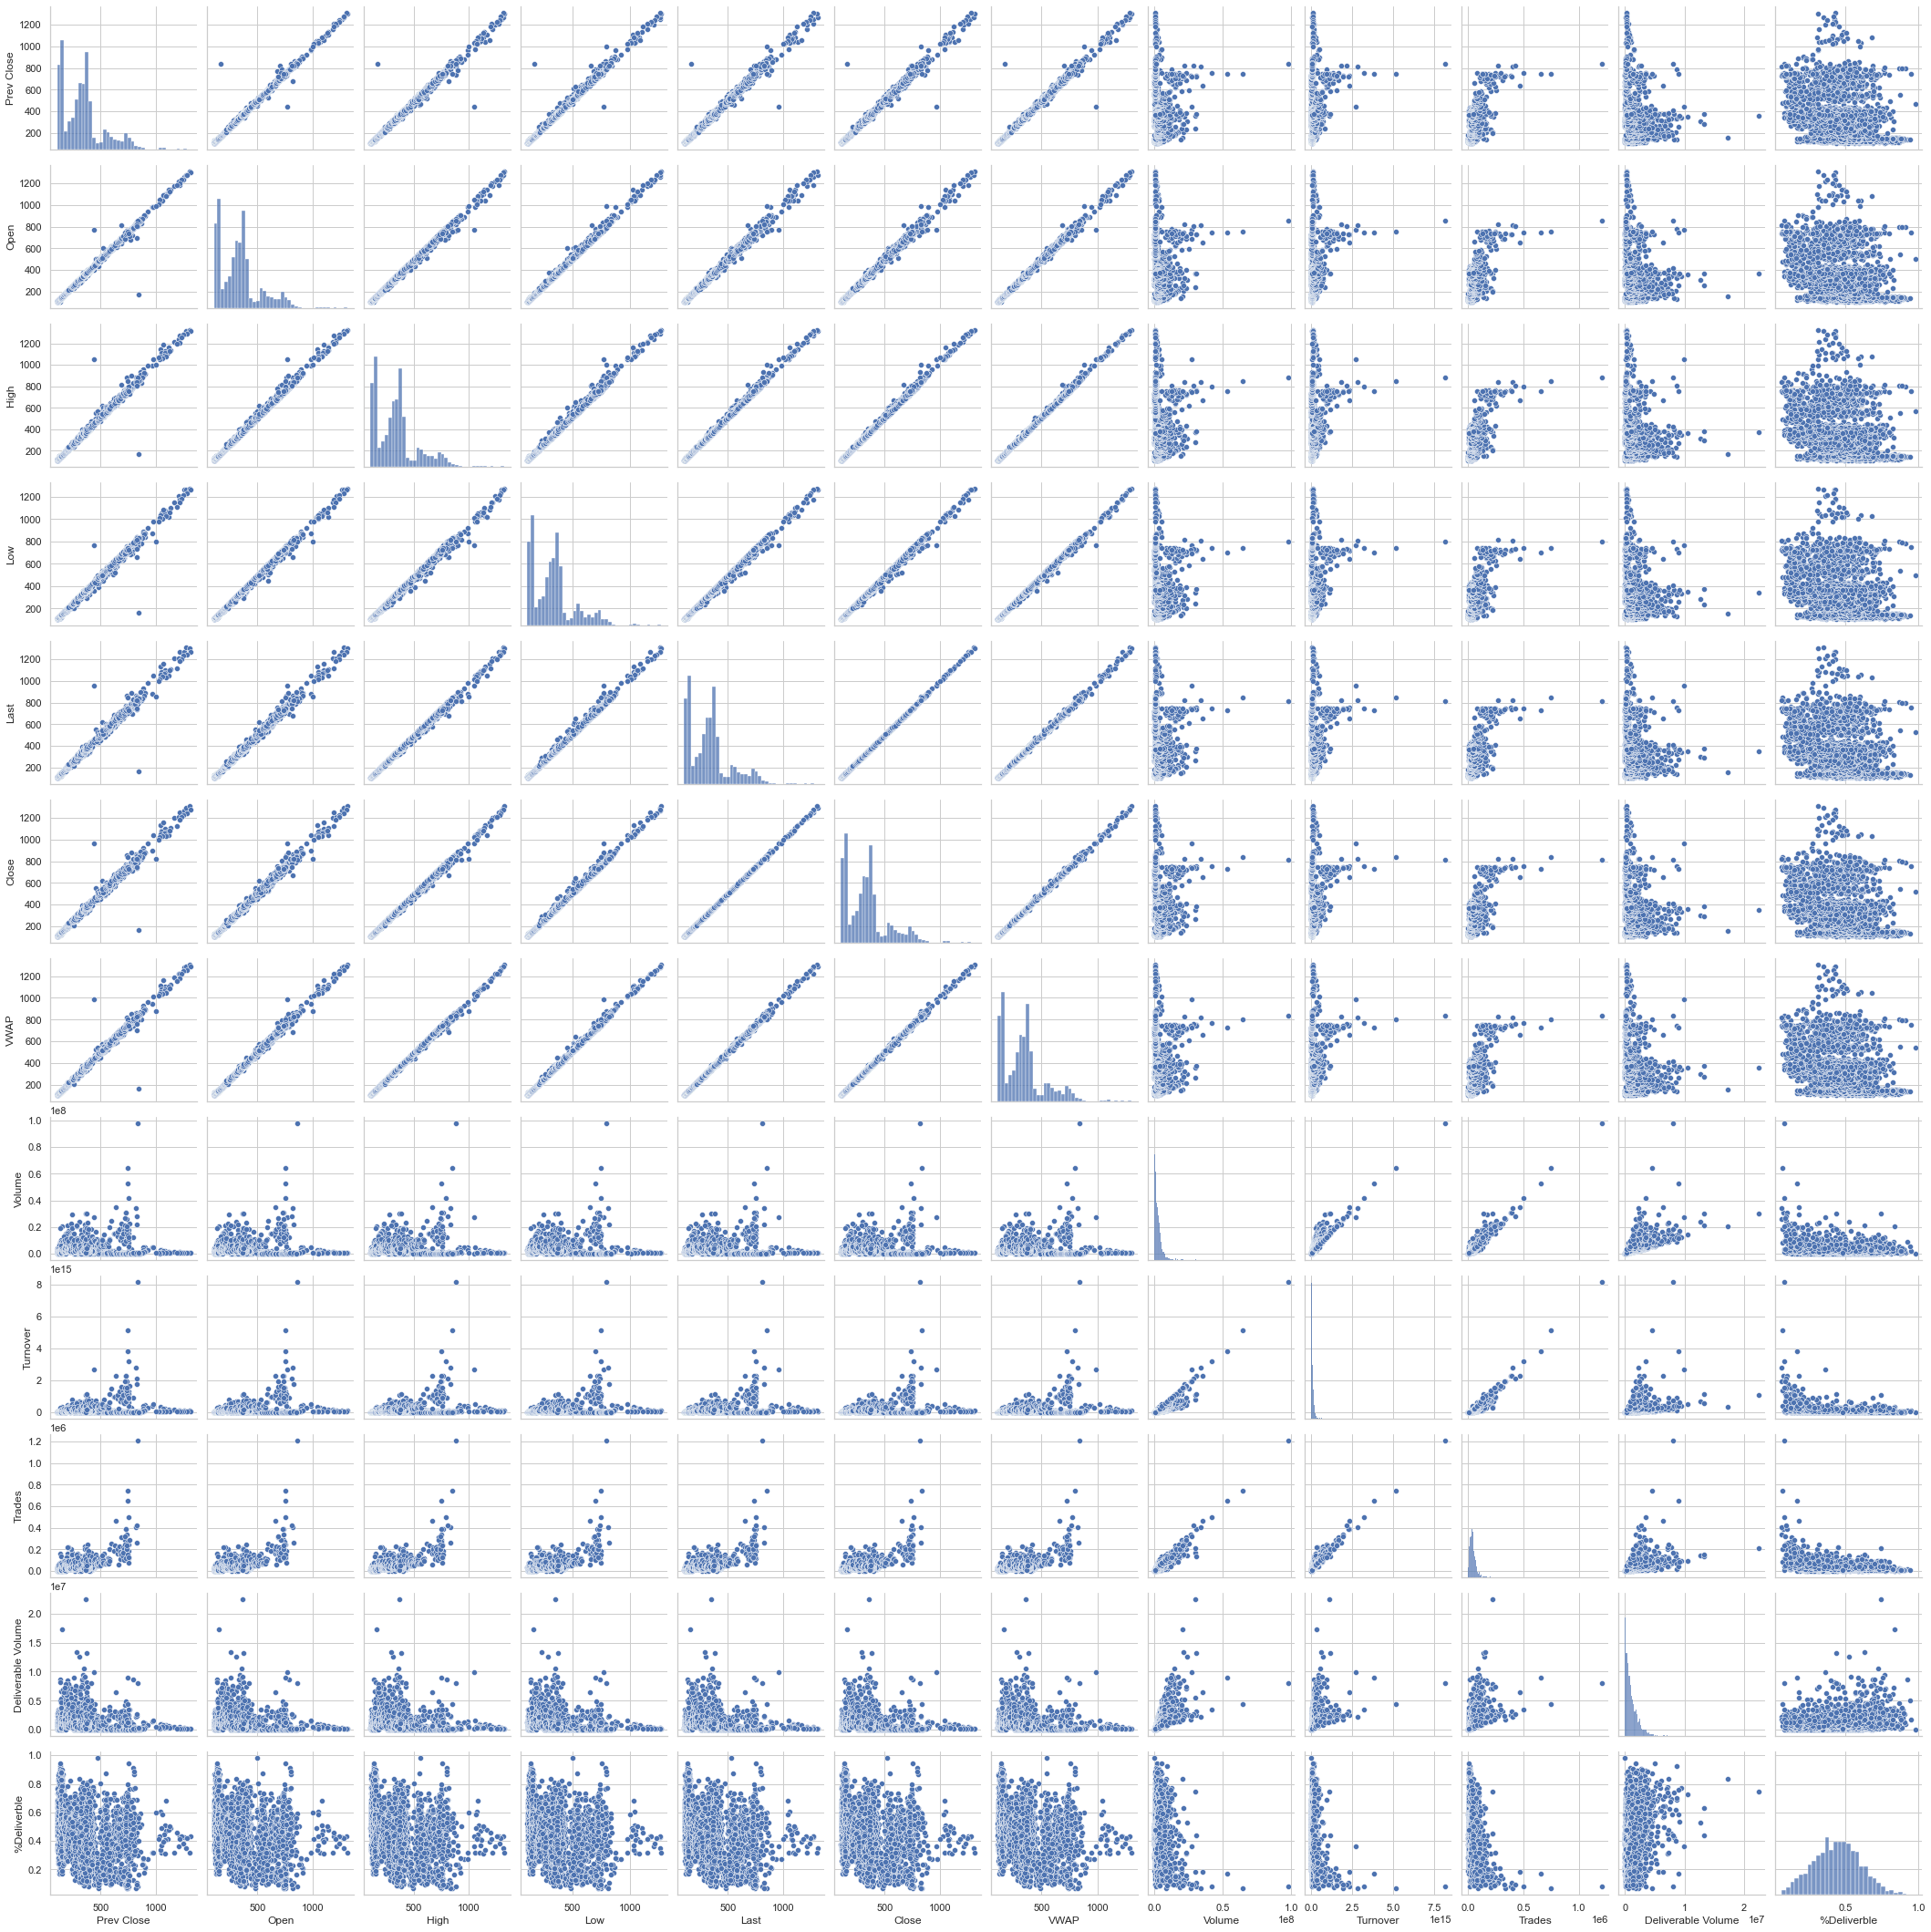

In [45]:
sns.pairplot(df)

In [24]:
#before covid
start_date = '2007-11-27'
end_date = '2020-03-20'
before_covid = (df['Date'] > start_date) & (df['Date'] <= end_date)
df1=df.loc[before_covid]
display(df1)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
5,2007-12-04,MUNDRAPORT,EQ,969.30,985.00,1056.00,976.0,1049.00,1041.45,1015.39,4849250,4.923867e+14,NaN,1537667,0.3171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,2020-03-16,ADANIPORTS,EQ,292.75,273.00,276.85,252.0,261.40,261.40,259.47,7727956,2.005211e+14,80189.0,1720741,0.2227
3043,2020-03-17,ADANIPORTS,EQ,261.40,265.00,283.35,265.0,265.95,267.15,273.83,9691227,2.653757e+14,73505.0,4179471,0.4313
3044,2020-03-18,ADANIPORTS,EQ,267.15,270.00,273.00,256.0,259.30,260.40,262.50,5581367,1.465114e+14,47683.0,2323024,0.4162
3045,2020-03-19,ADANIPORTS,EQ,260.40,248.00,264.15,241.0,257.00,258.35,255.92,8727962,2.233696e+14,64991.0,3098794,0.3550


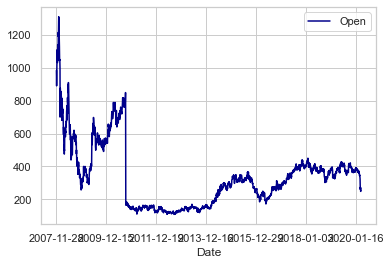

In [25]:
#Before covid
ax1 = df1.plot.line(x='Date',
                      y='Open',
                      c='DarkBlue')

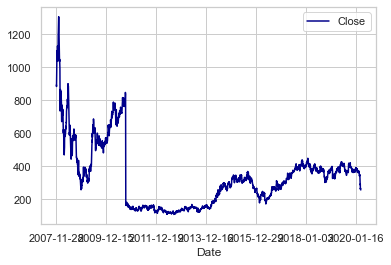

In [26]:
#Before covid
ax1 = df1.plot.line(x='Date',
                      y='Close',
                      c='DarkBlue')

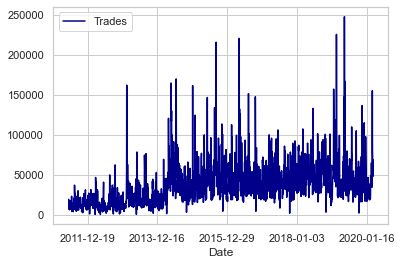

In [14]:
#Before Covide
ax1 = df1.plot.line(x='Date',
                      y='Trades',
                      c='DarkBlue')

In [27]:
#in covid
start_date = '2020-03-20'
end_date = '2020-12-31'
in_covid = (df['Date'] > start_date) & (df['Date'] <= end_date)
df2=df.loc[in_covid]
display(df2)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3047,2020-03-23,ADANIPORTS,EQ,256.40,235.00,235.80,203.00,215.00,207.80,211.60,5716818,1.209658e+14,56925.0,2160081,0.3778
3048,2020-03-24,ADANIPORTS,EQ,207.80,216.00,238.75,212.60,236.50,231.75,227.57,9694177,2.206140e+14,93631.0,4380397,0.4519
3049,2020-03-25,ADANIPORTS,EQ,231.75,222.30,266.50,222.30,255.60,255.60,242.79,11745146,2.851643e+14,92389.0,5445585,0.4636
3050,2020-03-26,ADANIPORTS,EQ,255.60,257.65,260.10,241.50,252.90,248.20,253.74,8701776,2.208012e+14,82755.0,3331147,0.3828
3051,2020-03-27,ADANIPORTS,EQ,248.20,259.00,259.60,244.00,251.35,251.30,251.99,4871655,1.227619e+14,52370.0,2051327,0.4211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,2020-12-24,ADANIPORTS,EQ,470.75,474.90,482.90,466.00,477.45,478.55,475.40,7679078,3.650637e+14,95603.0,951519,0.1239
3238,2020-12-28,ADANIPORTS,EQ,478.55,480.00,492.95,480.00,484.00,483.55,487.06,8372924,4.078086e+14,85170.0,592608,0.0708
3239,2020-12-29,ADANIPORTS,EQ,483.55,485.00,489.85,478.20,482.25,483.40,484.50,5866837,2.842463e+14,71303.0,834236,0.1422
3240,2020-12-30,ADANIPORTS,EQ,483.40,484.00,487.60,478.15,484.75,485.40,483.05,3736356,1.804834e+14,53291.0,330789,0.0885


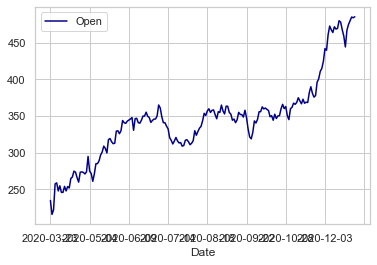

In [28]:
ax2 = df2.plot.line(x='Date',
                      y='Open',
                      c='DarkBlue')

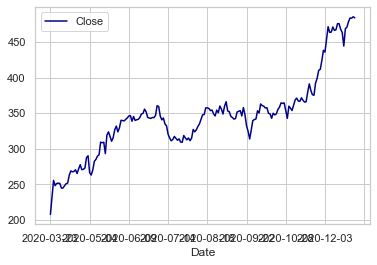

In [29]:
ax2 = df2.plot.line(x='Date',
                      y='Close',
                      c='DarkBlue')

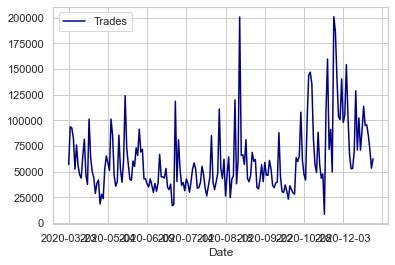

In [30]:
ax2 = df2.plot.line(x='Date',
                      y='Trades',
                      c='DarkBlue')

In [31]:
#after covid
start_date = '2021-01-01'
end_date = '2021-04-30'
after_covid = (df['Date'] > start_date) & (df['Date'] <= end_date)
df3=df.loc[after_covid]
display(df3)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3243,2021-01-04,ADANIPORTS,EQ,503.85,507.0,510.90,495.20,498.10,498.90,501.35,9998803,5.012949e+14,88263.0,1356432,0.1357
3244,2021-01-05,ADANIPORTS,EQ,498.90,498.9,504.50,492.00,498.75,499.45,499.14,5135408,2.563295e+14,57609.0,673387,0.1311
3245,2021-01-06,ADANIPORTS,EQ,499.45,501.8,504.95,489.50,495.00,496.80,499.09,5203982,2.597233e+14,55841.0,811974,0.1560
3246,2021-01-07,ADANIPORTS,EQ,496.80,500.1,520.90,499.50,513.45,513.85,512.28,10295126,5.273987e+14,116095.0,1591603,0.1546
3247,2021-01-08,ADANIPORTS,EQ,513.85,520.0,527.35,514.50,516.25,517.00,521.14,7272250,3.789849e+14,105599.0,1519864,0.2090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.0,739.65,728.90,729.20,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.0,757.50,727.35,748.60,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.0,760.00,741.10,743.40,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.2,765.85,743.40,746.40,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


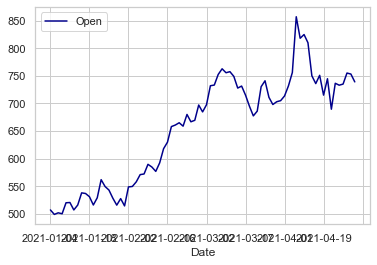

In [32]:
#after Covide
ax3 = df3.plot.line(x='Date',
                      y='Open',
                      c='DarkBlue')

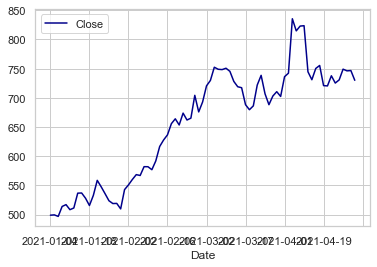

In [33]:
#after Covide
ax3 = df3.plot.line(x='Date',
                      y='Close',
                      c='DarkBlue')

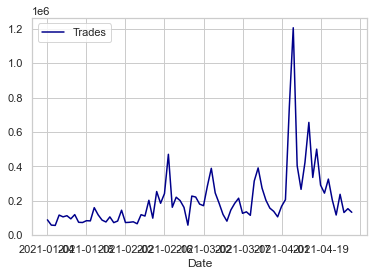

In [34]:
#after covide
ax3 = df3.plot.line(x='Date',
                      y='Trades',
                      c='DarkBlue')

In [50]:
#in covid
start_date = '2016-11-08'
end_date = '2016-12-09'
demonetization = (df['Date'] > start_date) & (df['Date'] <= end_date)
df4=df.loc[demonetization]
display(df4)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2214,2016-11-09,ADANIPORTS,EQ,289.85,268.00,283.00,260.90,282.10,282.40,275.10,7432798,2.044744e+14,46586.0,3289721,0.4426
2215,2016-11-10,ADANIPORTS,EQ,282.40,289.00,297.15,286.00,293.50,294.55,293.60,4488690,1.317875e+14,48698.0,2198975,0.4899
2216,2016-11-11,ADANIPORTS,EQ,294.55,288.00,293.00,272.85,280.50,276.75,281.20,4430411,1.245844e+14,63113.0,1963373,0.4432
2217,2016-11-15,ADANIPORTS,EQ,276.75,280.70,280.70,258.00,265.30,266.65,266.50,4007163,1.067912e+14,46417.0,1649133,0.4115
2218,2016-11-16,ADANIPORTS,EQ,266.65,271.00,275.00,260.90,264.90,265.25,265.84,3586045,9.533193e+13,41518.0,1835088,0.5117
2219,2016-11-17,ADANIPORTS,EQ,265.25,267.00,269.40,262.20,265.00,264.60,265.15,2448535,6.492302e+13,35652.0,1299703,0.5308
2220,2016-11-18,ADANIPORTS,EQ,264.60,265.00,266.30,256.80,262.10,261.90,262.48,2821119,7.404875e+13,25742.0,1507159,0.5342
2221,2016-11-21,ADANIPORTS,EQ,261.90,262.05,265.00,245.15,258.65,255.70,253.50,4715918,1.195498e+14,52487.0,1826801,0.3874
2222,2016-11-22,ADANIPORTS,EQ,255.70,257.00,263.20,257.00,261.15,260.80,260.29,4773262,1.242451e+14,49322.0,2752658,0.5767
2223,2016-11-23,ADANIPORTS,EQ,260.80,263.95,264.70,258.10,262.80,263.70,261.96,4191100,1.097920e+14,38810.0,2446748,0.5838


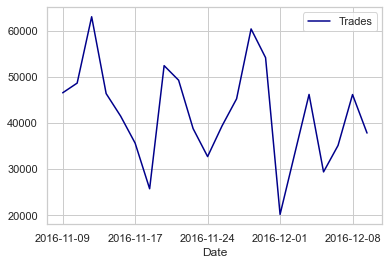

In [52]:
ax4 = df4.plot.line(x='Date',
                      y='Trades',
                      c='DarkBlue')

In [53]:
df.head(1)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.0,770.0,1050.0,770.0,959.0,962.9,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
